# The Law of large number

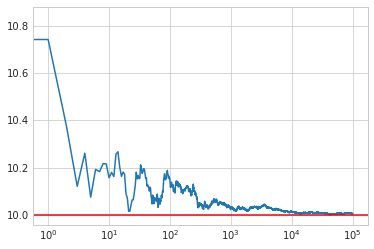

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.semilogx(pd.Series(np.random.normal(loc = 10, size=100000)).expanding(1).mean())
plt.axhline(10, color="r");

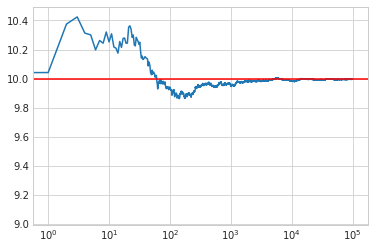

In [3]:
plt.semilogx(np.cumsum(np.random.normal(loc=10, size=100000)) / np.arange(1, 100001))
plt.axhline(10, color="r")


# Probability distribution

## The uniform distribution

In [7]:
import scipy.stats as stats

uniform_data = stats.uniform.rvs(size=100000, loc=0, scale=10)


In [8]:
dir(stats.uniform)


['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_argcheck',
 '_argcheck_rvs',
 '_attach_argparser_methods',
 '_attach_methods',
 '_cdf',
 '_cdf_single',
 '_cdfvec',
 '_construct_argparser',
 '_construct_default_doc',
 '_construct_doc',
 '_ctor_param',
 '_entropy',
 '_fit_loc_scale_support',
 '_fitstart',
 '_get_support',
 '_isf',
 '_logcdf',
 '_logpdf',
 '_logsf',
 '_mom0_sc',
 '_mom1_sc',
 '_mom_integ0',
 '_mom_integ1',
 '_moment_error',
 '_munp',
 '_nnlf',
 '_nnlf_and_penalty',
 '_open_support_mask',
 '_parse_arg_template',
 '_parse_args',
 '_parse_args_rvs',
 '_parse_args_stats',
 '_pdf',
 '_penalized_nnlf',
 '_ppf',
 

- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-CDF)
- ppf: Percent Point Function (Inverse of CDF)
- isf: Inverse Survival Function (Inverse of SF)
- stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
- moment: non-central moments of the distribution

[The scipy stats package](https://docs.scipy.org/doc/scipy/reference/stats.html)

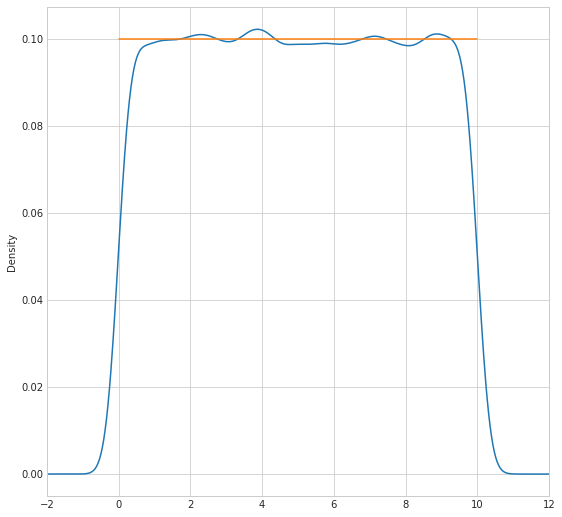

In [9]:
## The PDF

pd.Series(uniform_data).plot(kind="density", figsize=(9, 9), xlim=(-2, 12))

values = np.linspace(0, 10, 1000)
plt.plot(values, stats.uniform.pdf(values, loc=0, scale=10))


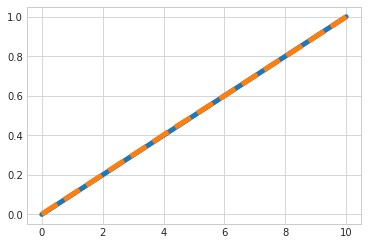

In [10]:
## The CDF

plt.plot(values, stats.uniform.cdf(values, loc=0, scale=10), lw=5)
distribution = np.histogram(uniform_data, bins=1000, density=True)[0]
plt.plot(values, 10 * distribution.cumsum() / len(distribution), "--", lw=5)


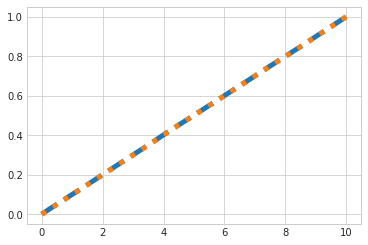

In [11]:
plt.plot(values, distribution.cumsum() / sum(distribution), "--", lw=5)
delta_x = values[1:] - values[:-1]
delta_x = np.insert(delta_x, 0, 0.0)
plt.plot(values, (distribution * delta_x).cumsum(), ":", lw=5)


array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

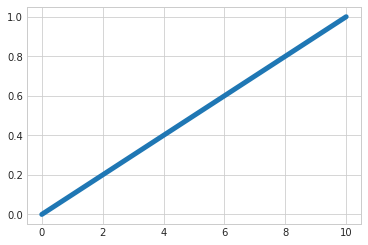

In [12]:
## The probability cutoff: the inverse CDF

unit_values = np.linspace(0, 1, 1000)
plt.plot(stats.uniform.ppf(q=unit_values, loc=0, scale=10), unit_values, lw=5)


In [13]:
stats.norm.pdf(x=np.linspace(0, 10, 100))
stats.chi2.pdf(x=np.linspace(0, 10, 100), df=2)


array([0.5       , 0.47537456, 0.45196195, 0.42970243, 0.40853921,
       0.3884183 , 0.36928836, 0.35110058, 0.33380857, 0.31736821,
       0.30173755, 0.28687671, 0.27274778, 0.25931472, 0.24654324,
       0.23440077, 0.22285633, 0.21188046, 0.20144516, 0.19152381,
       0.1820911 , 0.17312295, 0.16459649, 0.15648997, 0.14878271,
       0.14145503, 0.13448824, 0.12786458, 0.12156714, 0.11557985,
       0.10988744, 0.10447539, 0.09932988, 0.0944378 , 0.08978666,
       0.08536459, 0.08116031, 0.07716309, 0.07336274, 0.06974956,
       0.06631433, 0.0630483 , 0.05994311, 0.05699086, 0.05418401,
       0.0515154 , 0.04897822, 0.046566  , 0.04427259, 0.04209212,
       0.04001905, 0.03804808, 0.03617418, 0.03439257, 0.0326987 ,
       0.03108826, 0.02955714, 0.02810142, 0.0267174 , 0.02540155,
       0.0241505 , 0.02296107, 0.02183021, 0.02075506, 0.01973285,
       0.01876099, 0.017837  , 0.01695851, 0.01612329, 0.0153292 ,
       0.01457423, 0.01385643, 0.01317399, 0.01252516, 0.01190

## The Normal distribution

In [14]:
prob_under_minus1 = stats.norm.cdf(x=-1, loc=0, scale=1)

prob_over_1 = 1 - stats.norm.cdf(x=1, loc=0, scale=1)

between_prob = 1 - (prob_under_minus1 + prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)


0.15865525393145707 0.15865525393145707 0.6826894921370859


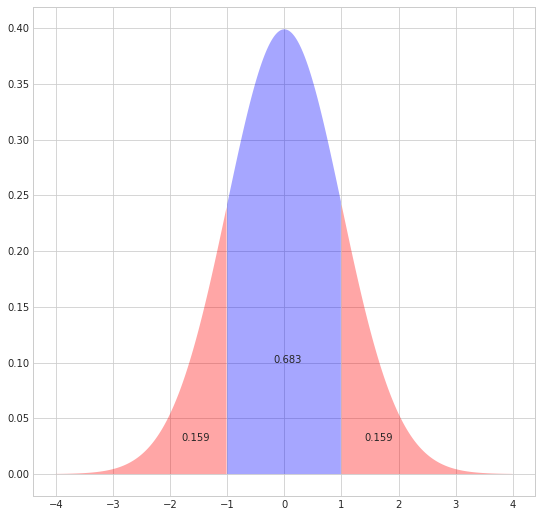

In [15]:
plt.rcParams["figure.figsize"] = (9, 9)

plt.fill_between(
    x=np.arange(-4, -1, 0.01),
    y1=stats.norm.pdf(np.arange(-4, -1, 0.01)),
    facecolor="red",
    alpha=0.35,
)

plt.fill_between(
    x=np.arange(1, 4, 0.01),
    y1=stats.norm.pdf(np.arange(1, 4, 0.01)),
    facecolor="red",
    alpha=0.35,
)

plt.fill_between(
    x=np.arange(-1, 1, 0.01),
    y1=stats.norm.pdf(np.arange(-1, 1, 0.01)),
    facecolor="blue",
    alpha=0.35,
)

plt.text(x=-1.8, y=0.03, s=round(prob_under_minus1, 3))
plt.text(x=-0.2, y=0.1, s=round(between_prob, 3))
plt.text(x=1.4, y=0.03, s=round(prob_over_1, 3))


## The binomial distribution

5     2518
6     2086
4     2010
3     1190
7     1150
2      427
8      414
9      102
1       83
0       10
10      10
dtype: int64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

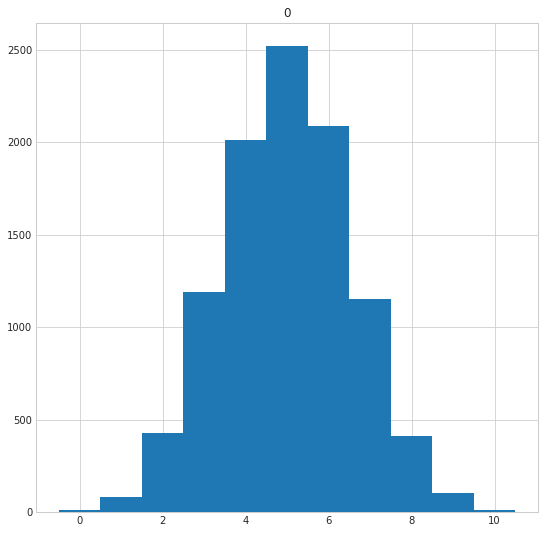

In [16]:
fair_coin_flips = stats.binom.rvs(
    n=10, p=0.5, size=10000  # Number of flips per trial  # Success probability
)  # Number of trials

print(pd.Series(fair_coin_flips).value_counts())

pd.DataFrame(fair_coin_flips).hist(range=(-0.5, 10.5), bins=11)


# Markov Chains

In [18]:
customers = ["UID" + str(i) for i in range(1000)]
customers


['UID0',
 'UID1',
 'UID2',
 'UID3',
 'UID4',
 'UID5',
 'UID6',
 'UID7',
 'UID8',
 'UID9',
 'UID10',
 'UID11',
 'UID12',
 'UID13',
 'UID14',
 'UID15',
 'UID16',
 'UID17',
 'UID18',
 'UID19',
 'UID20',
 'UID21',
 'UID22',
 'UID23',
 'UID24',
 'UID25',
 'UID26',
 'UID27',
 'UID28',
 'UID29',
 'UID30',
 'UID31',
 'UID32',
 'UID33',
 'UID34',
 'UID35',
 'UID36',
 'UID37',
 'UID38',
 'UID39',
 'UID40',
 'UID41',
 'UID42',
 'UID43',
 'UID44',
 'UID45',
 'UID46',
 'UID47',
 'UID48',
 'UID49',
 'UID50',
 'UID51',
 'UID52',
 'UID53',
 'UID54',
 'UID55',
 'UID56',
 'UID57',
 'UID58',
 'UID59',
 'UID60',
 'UID61',
 'UID62',
 'UID63',
 'UID64',
 'UID65',
 'UID66',
 'UID67',
 'UID68',
 'UID69',
 'UID70',
 'UID71',
 'UID72',
 'UID73',
 'UID74',
 'UID75',
 'UID76',
 'UID77',
 'UID78',
 'UID79',
 'UID80',
 'UID81',
 'UID82',
 'UID83',
 'UID84',
 'UID85',
 'UID86',
 'UID87',
 'UID88',
 'UID89',
 'UID90',
 'UID91',
 'UID92',
 'UID93',
 'UID94',
 'UID95',
 'UID96',
 'UID97',
 'UID98',
 'UID99',
 'UID100',

In [19]:
dates = pd.date_range("2013-01", "2017-01", freq="M")
dates


DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [20]:
from itertools import product

customer_df = pd.DataFrame(
    list(product(customers, dates)), columns=["CustomerID", "Date"]
)
customer_df


,CustomerID,Date
0,UID0,2013-01-31
1,UID0,2013-02-28
2,UID0,2013-03-31
3,UID0,2013-04-30
4,UID0,2013-05-31
...,...,...
47995,UID999,2016-08-31
47996,UID999,2016-09-30
47997,UID999,2016-10-31
47998,UID999,2016-11-30


In [21]:
def choose_jump(x):
    x_temp = x.copy()
    probas = np.random.uniform(size=3)
    probas /= sum(probas)
    x_temp["Jump"] = np.random.choice([-1, 0, 1], p=probas, size=x.shape[0])
    return x_temp


customer_df = customer_df.groupby(["CustomerID"]).apply(choose_jump)
customer_df


,CustomerID,Date,Jump
0,UID0,2013-01-31,0
1,UID0,2013-02-28,-1
2,UID0,2013-03-31,0
3,UID0,2013-04-30,-1
4,UID0,2013-05-31,-1
...,...,...,...
47995,UID999,2016-08-31,1
47996,UID999,2016-09-30,0
47997,UID999,2016-10-31,-1
47998,UID999,2016-11-30,0


In [25]:
customer_df["State"] = (
    customer_df.rename_axis(None).groupby("CustomerID").cumsum()["Jump"]
)
customer_df


,CustomerID,Date,Jump,State
0,UID0,2013-01-31,0,0
1,UID0,2013-02-28,-1,-1
2,UID0,2013-03-31,0,-1
3,UID0,2013-04-30,-1,-2
4,UID0,2013-05-31,-1,-3
...,...,...,...,...
47995,UID999,2016-08-31,1,-7
47996,UID999,2016-09-30,0,-7
47997,UID999,2016-10-31,-1,-8
47998,UID999,2016-11-30,0,-8


In [26]:
## Only between 0 and 7
customer_df["State_clip"] = np.clip(customer_df["State"], 0, 7)
customer_df


,CustomerID,Date,Jump,State,State_clip
0,UID0,2013-01-31,0,0,0
1,UID0,2013-02-28,-1,-1,0
2,UID0,2013-03-31,0,-1,0
3,UID0,2013-04-30,-1,-2,0
4,UID0,2013-05-31,-1,-3,0
...,...,...,...,...,...
47995,UID999,2016-08-31,1,-7,0
47996,UID999,2016-09-30,0,-7,0
47997,UID999,2016-10-31,-1,-8,0
47998,UID999,2016-11-30,0,-8,0


In [27]:
pd.options.display.max_rows = 300
customer_df = customer_df.reset_index(level=0, drop=True)


def replace_values(df):
    temp = df.copy()
    date = temp.loc[temp["State_clip"] == 7, "Date"]
    if not date.empty:
        temp.loc[temp["Date"] >= date.values[0], "State_clip"] = 7
    return temp


customer_df = (
    customer_df.groupby(["CustomerID"]).apply(replace_values).reset_index(drop=True)
)
customer_df


,CustomerID,Date,Jump,State,State_clip
0,UID0,2013-01-31,0,0,0
1,UID0,2013-02-28,-1,-1,0
2,UID0,2013-03-31,0,-1,0
3,UID0,2013-04-30,-1,-2,0
4,UID0,2013-05-31,-1,-3,0
...,...,...,...,...,...
47995,UID999,2016-08-31,1,-7,0
47996,UID999,2016-09-30,0,-7,0
47997,UID999,2016-10-31,-1,-8,0
47998,UID999,2016-11-30,0,-8,0


In [28]:
customer_df["State_clip"].value_counts().sort_index()


0    26399
1     3276
2     2715
3     2289
4     1808
5     1230
6      817
7     9466
Name: State_clip, dtype: int64

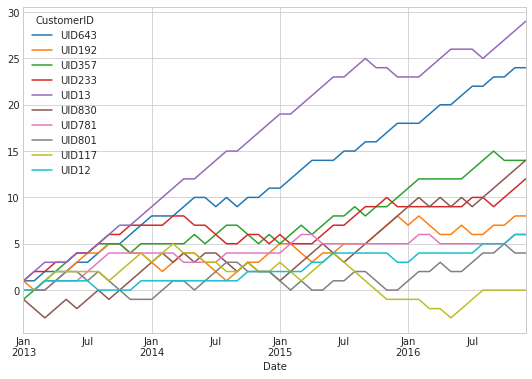

In [30]:
customer_df.pivot(index="Date", columns="CustomerID", values="State").sample(
    10, axis=1
).plot(figsize=(9, 6))


In [31]:
customer_df["State"] = customer_df["State_clip"]
customer_df[["CustomerID", "Date", "State"]].to_csv("./customer_state_data.csv")


In [32]:
customer_df["Next_State"] = customer_df.groupby(["CustomerID"])["State_clip"].shift(-1)
customer_df


,CustomerID,Date,Jump,State,State_clip,Next_State
0,UID0,2013-01-31,0,0,0,0.0
1,UID0,2013-02-28,-1,0,0,0.0
2,UID0,2013-03-31,0,0,0,0.0
3,UID0,2013-04-30,-1,0,0,0.0
4,UID0,2013-05-31,-1,0,0,0.0
...,...,...,...,...,...,...
47995,UID999,2016-08-31,1,0,0,0.0
47996,UID999,2016-09-30,0,0,0,0.0
47997,UID999,2016-10-31,-1,0,0,0.0
47998,UID999,2016-11-30,0,0,0,0.0


## The average customer

We can estimate the average probability transition matrix from the data

$$P= \left( \begin{array}{cc}
Q & R \\
0 & I_r \end{array} \right)$$

In [33]:
P_avg = pd.crosstab(customer_df["State_clip"], customer_df["Next_State"], normalize=0)
P_avg


Next_State,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
State_clip,,,,,,,,
0,0.958184,0.041816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.284878,0.352633,0.362488,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.271275,0.362319,0.366407,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.248346,0.382003,0.369652,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.244134,0.377654,0.378212,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.240589,0.330606,0.428805,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.185093,0.363975,0.450932
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


### The expected number of steps from state $i$ to state $j$

Let  $p_{i,j}$  be the probability of transitioning from  $i$  to  $j$ . Note that the  $(i,j)$th  element of the transition matrix is just  $p_{i,j}$ . Let  $N_i$  be the expected number of steps to reach an absorbing state from state  $i$ . Then $N_i$  must satisfy the equation:

$$N_i = 1+\sum_{j=0}^np_{i,j}N_j$$

It means that the state $i$ is in average one step further than the next state $j$. Note that this is true if $i$ and $j$ are not absorbing states. 

In matrix notation we get:

\begin{eqnarray}
N &=& \mathbf{1}+QN \\
\Rightarrow (I-Q)N&=&\mathbf{1}\\
\end{eqnarray}
$\mathbf{1}$ is a column vector of all  1's. Therefore we have

$$\Rightarrow N=(I-Q)^{-1}\mathbf{1}$$

In [34]:
from numpy.linalg import pinv

N = pd.DataFrame(pinv(np.eye(P_avg.shape[0] - 1) - P_avg.iloc[:-1, :-1]))

N.loc[
    7,
] = 0
N = N.sum(1)
N


0    107.299934
1     83.385886
2     61.833214
3     43.147159
4     27.887912
5     15.394129
6      6.052198
7      0.000000
dtype: float64

## How to estimate the probability transition matrix for a specific customer

### Laplace smoothing

Orginal average probability to go from $i$ to $j$: $p_{ij}$

Naive estimation of a probability: 
$$p_{ij}=\frac{\sum_{k=1}^m1_{\{s=i,f=j\}}}{m},$$
$m$ being the number of times the process started in $i$.

To get an estimation of a probability transition even if a customer never took the $i\rightarrow j$ path

Customer $C$:              
$$p_{ij}^C= \frac{\sum_{k=1}^m1_{\{s=i,f=j\}} + 1}{m + 1/p_{ij}}$$


In [35]:
def get_adjusted_P(df, P_original):

    cross_cust = pd.DataFrame(
        pd.crosstab(df["State_clip"], df["Next_State"]),
        index=range(8),
        columns=range(8),
    ).fillna(0)

    number = pd.DataFrame(np.ones([8, 8])).apply(
        lambda r: r * cross_cust.sum(1), axis=0
    )
    P_spe = ((cross_cust + 1) / (number + 1 / P_original)).apply(
        lambda r: r / r.sum(), axis=1
    )
    N = pd.DataFrame(pinv(np.eye(P_spe.shape[0] - 1) - P_spe.iloc[:-1, :-1]))
    N.loc[
        7,
    ] = 0

    return P_spe, N.sum(1)


In [36]:
df = customer_df.loc[customer_df["CustomerID"] == "UID340"]

P_spe, N = get_adjusted_P(df, P_avg)
N


0    82.598278
1    78.867358
2    70.748055
3    65.033706
4    55.424502
5    39.551924
6    13.082493
7     0.000000
dtype: float64

In [37]:
df


,CustomerID,Date,Jump,State,State_clip,Next_State
16320,UID340,2013-01-31,0,0,0,0.0
16321,UID340,2013-02-28,0,0,0,0.0
16322,UID340,2013-03-31,0,0,0,0.0
16323,UID340,2013-04-30,0,0,0,1.0
16324,UID340,2013-05-31,1,1,1,0.0
16325,UID340,2013-06-30,-1,0,0,1.0
16326,UID340,2013-07-31,1,1,1,2.0
16327,UID340,2013-08-31,1,2,2,3.0
16328,UID340,2013-09-30,1,3,3,3.0
16329,UID340,2013-10-31,0,3,3,3.0


## Probability to probability to reach state 7 in $n$ months

Probability transition matrix after n steps:

$$P^{(n)}=P^n$$

Probability to  to reach state 7 within $n$ months from a state $i$:

$$p_{i7,n}= p_{i7}^{(1)} +  (1-p_{i7}^{(1)})p_{i7}^{(2)} + \ldots +   (1-p_{i7}^{(1)})\ldots(1-p_{i7}^{(n-1)})p_{i7}^{(n)}$$
$$p_{i7,n}= p_{i7} + \sum_{k=2}^np_{i7}^{(k)}\prod_{l=1}^{k-1}1-p_{i7}^{(l)}$$
$$p_{i7,n}= p_{i7,n-1} + p_{i7}^{(n)}\prod_{l=0}^{n-1}1-p_{i7}^{(l)}$$

In [38]:
from numpy import linalg as LA


def get_P_n(P, n):
    P_list = np.array([pd.DataFrame(LA.matrix_power(P, i + 1))[7] for i in range(n)])
    P_cum_prod = np.cumprod([1 - P for P in P_list[:-1]], 0)
    return pd.Series(P_list[0] + (P_list[1:] * P_cum_prod).sum(0))


df = customer_df.loc[customer_df["CustomerID"] == "UID6"]

P_spe, N = get_adjusted_P(df, P_avg)
get_P_n(P_spe, 10)


0    0.002789
1    0.084951
2    0.285825
3    0.587386
4    0.948239
5    0.999245
6    1.000000
7    1.000000
dtype: float64

In [39]:
df = customer_df.loc[customer_df["CustomerID"] == "UID1"]

P_spe, N = get_adjusted_P(df, P_avg)
get_P_n(P_spe, 24)


0    0.581740
1    0.992766
2    0.998513
3    0.999991
4    1.000000
5    1.000000
6    1.000000
7    1.000000
dtype: float64

In [40]:
def get_proba(x):
    P_spe, _ = get_adjusted_P(x, P_avg)
    return get_P_n(P_spe, 24)[0]


result = customer_df.groupby("CustomerID").apply(
    lambda x: pd.Series(
        [get_proba(x), x["State_clip"].max()], index=["Proba", "Max_state"]
    )
)


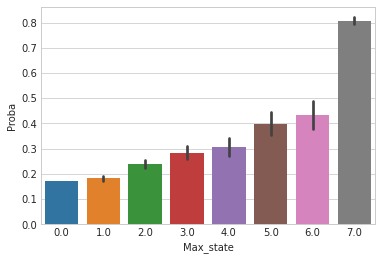

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Max_state", y="Proba", data=result);

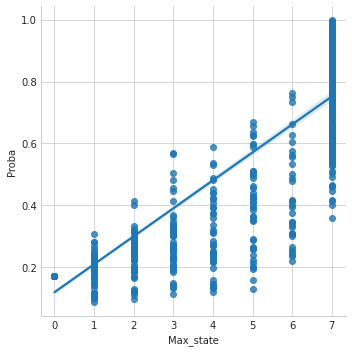

In [42]:
sns.lmplot(x="Max_state", y="Proba", data=result)
